In [3]:
# translasi ( transformasi untuk pergeseran citra dalam sumbu x dan y)
from PIL import Image
def translasi( nama_file, x, y):
    CITRA = Image.open('asszilla.png')
    PIXEL = CITRA.load()
    
    height = CITRA.size[0]
    width = CITRA.size[1]
    
    CITRA_BARU = Image.new("RGB", (height, width))
    PIXEL_BARU = CITRA_BARU.load()
    
    start_x = x
    start_y = y
    
    if x < 0:
        start_x = 0
    if y < 0:
        start_y = 0
    
    for x1 in range(start_x, height):
        for y1 in range(start_y, width):
            x_baru = x1 - x
            y_baru = y1 - y
            
            if (x_baru >= height or y_baru >= width or x_baru < 0):
                PIXEL_BARU[x1, y1] = (0, 0, 0)
            else:
                PIXEL_BARU[x1, y1] = PIXEL[x_baru, y_baru]
        
    nama_setelah_disave = "asszilla_translasi_" + str(x) + "_" + str(y) + ".png"
    CITRA_BARU.save(nama_setelah_disave)
    CITRA_BARU.show()

translasi("asszilla.png", -20, -50)
translasi("asszilla.png", 20, 50)

Text(0.5, 1.0, 'Affine Transformation: Translation')

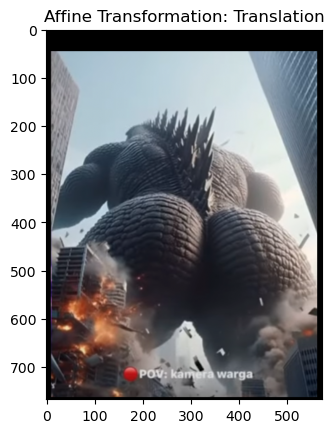

In [5]:
from PIL import Image
from matplotlib import pyplot as plt
from skimage.transform import warp, AffineTransform
from skimage.util import img_as_float
# import skimage

tform = AffineTransform(translation=(10, 4))
img = Image.open("asszilla_translasi_20_50.png")
img = img_as_float(img)
tf_image = warp(img, tform)
fig, ax = plt.subplots()
ax.imshow(tf_image)
ax.set_title('Affine Transformation: Translation')


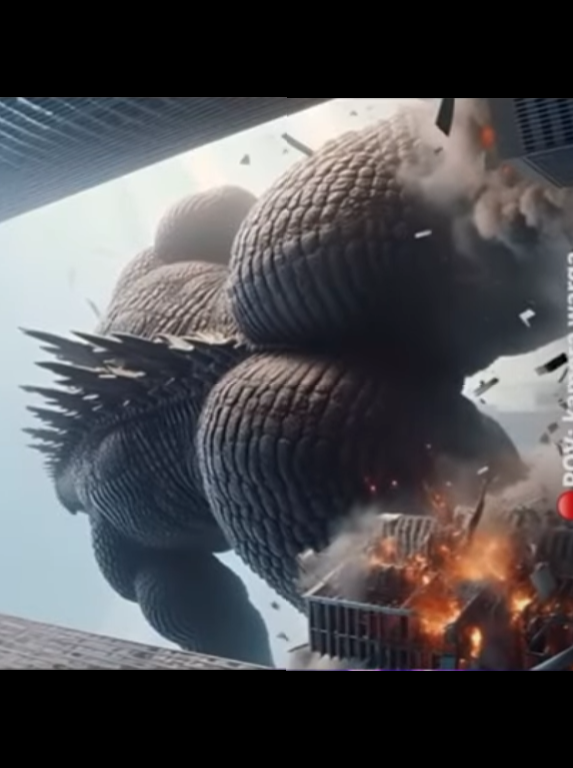

In [ ]:
from PIL import Image
from math import sin, cos

def rotasi(nama_file, derajat):
    CITRA = Image.open(nama_file)
    PIXEL = CITRA.load()
    
    height = CITRA.size[0]
    width = CITRA.size[1]
    
    CITRA_BARU = Image.new("RGB", (height, width))
    PIXEL_BARU = CITRA_BARU.load()
    
    x_tengah = height // 2
    y_tengah = width // 2
    
    for x in range(height):
        for y in range (width):
        # theta = radian
            theta = derajat * 3.14 / 180
        
        # rumus rotasi dengan pusat rotasi bebas(disini tengah)
            x_baru = (cos(theta) * (x - x_tengah) - sin(theta) * (y - y_tengah) + x_tengah)
            y_baru = (sin(theta) * (x - x_tengah) + cos(theta) * (y - y_tengah) + y_tengah)
        
        # rumus rotasi dengan pusat rotasi tetap (0,0)
        # dari buku rinaldi munir
        # x_baru = x * cos(theta) - y * sin(theta)
        # y_baru = x * sin(theta) + y * cos(theta)
        
            if (x_baru >= height or y_baru >= width or x_baru < 0 or y_baru < 0):
                PIXEL_BARU[x, y] = (0, 0, 0)
            else:
                PIXEL_BARU[x, y] = PIXEL[x_baru, y_baru]
    
    nama_setelah_disave = "asszilla_rotasi_" + str(derajat) + ".png"
    CITRA_BARU.save(nama_setelah_disave)
    CITRA_BARU.show()
    return CITRA_BARU
rotasi('asszilla.png', 5)
rotasi('asszilla.png', 90)
    

Text(0.5, 1.0, 'Affine Transformation: Rotation')

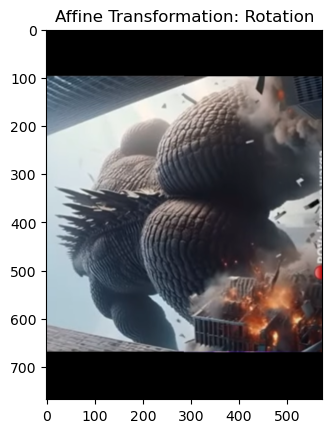

In [ ]:
fig, ax = plt.subplots()
ax.imshow(rotasi('asszilla.png', 90))
ax.set_title('Affine Transformation: Rotation')

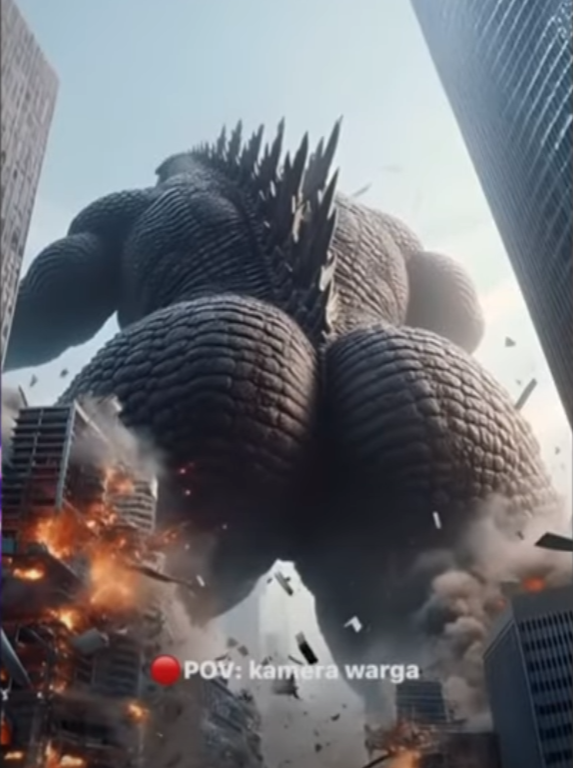

In [22]:
from math import floor

def transformasi_skala(nama_file, skala):
    CITRA = Image.open(nama_file)
    PIXEL = CITRA.load()
    
    height = CITRA.size[0]
    width = CITRA.size[1]
    
    height_baru = floor(height * skala)
    width_baru = floor(width * skala)
    
    CITRA_BARU = Image.new("RGB", (height_baru, width_baru))
    PIXEL_BARU = CITRA_BARU.load()
    
    for x in range(height_baru):
        for y in range(width_baru):
            x_lama = height_baru * x / height_baru
            y_lama = width_baru * y / width_baru
            PIXEL_BARU[x, y] = PIXEL[x_lama, y_lama]
            
            # if (x_lama >= height or y_lama >= width or x_lama < 0 or y_lama < 0):
            #     PIXEL_BARU[x, y] = (0, 0, 0)
            # else:
            #     PIXEL_BARU[x, y] = PIXEL[x_lama, y_lama]
            
    nama_setelah_disave = "asszilla_translasi_" + str(skala).replace('.',',') + ".png"
    CITRA_BARU.save(nama_setelah_disave)
    CITRA_BARU.show()
    return CITRA_BARU

transformasi_skala('asszilla.png', 1)  

Text(0.5, 1.0, 'Affine Transformation: Scaling')

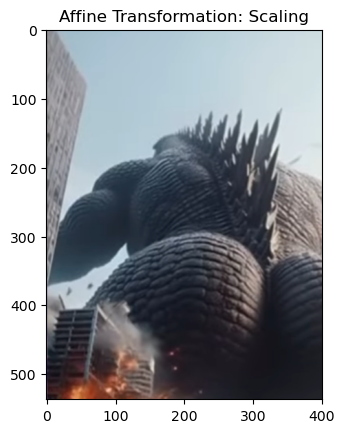

In [24]:
fig, ax = plt.subplots()
ax.imshow(transformasi_skala('asszilla.png', 0.7))
ax.set_title('Affine Transformation: Scaling')

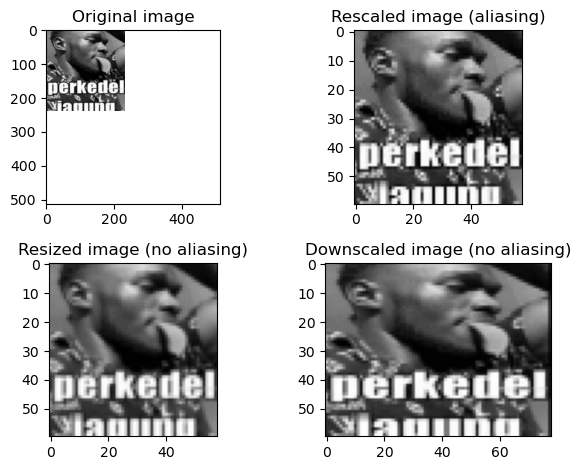

In [31]:
#Scale 
import matplotlib.pyplot as plt

from skimage import data, color
from skimage.transform import rescale, resize, downscale_local_mean

img = Image.open('perkedel.jpg').convert('RGB')
image = color.rgb2gray(img)

image_rescaled = rescale(image, 0.25, anti_aliasing=False)
image_resized = resize(
    image, (image.shape[0] // 4, image.shape[1] // 4), anti_aliasing=True
)
image_downscaled = downscale_local_mean(image, (4, 3))

fig, axes = plt.subplots(nrows=2, ncols=2)

ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original image")

ax[1].imshow(image_rescaled, cmap='gray')
ax[1].set_title("Rescaled image (aliasing)")

ax[2].imshow(image_resized, cmap='gray')
ax[2].set_title("Resized image (no aliasing)")

ax[3].imshow(image_downscaled, cmap='gray')
ax[3].set_title("Downscaled image (no aliasing)")

ax[0].set_xlim(0, 512)
ax[0].set_ylim(512, 0)
plt.tight_layout()
plt.show()